# Part III: What can I charge for the place I have? 

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib
%matplotlib inline

## Step 1: Gather

I will be using the 'listings.csv' dataset to try answer my question about how much I can expect to charge for the place I want to list on AirBnB. 

In [2]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Step 2: Analyse

Next I want to look at the columns that could influence how I set my price and get them ready for modelling. 

In [3]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Step 3: Clean

I am interested in the *price* column, which needs to be cleaned up a bit.

In [4]:
#Convert price to float
df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_17846/1456755852.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")


In [5]:
def check_missing_values(df):
    
    missing = df.isnull().mean()*100
    columns_with_null = missing[missing > 0]
    
    if columns_with_null.shape[0] > 0:
        columns_with_null.plot.bar(title='Missing values per column, %')
    else:
        return "No columns with missing values"

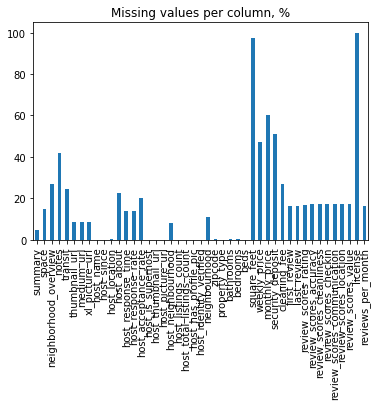

In [6]:
check_missing_values(df_listings)

I can now identify which columns I need to remove from the dataset: 
- Columns which logically do not influence the price e.g. host_thumbnail_url
- Columns which I have no control over e.g. number_of_reviews
- Columns which are missing too much information e.g. license, square_feet

In [7]:
drop_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 'experiences_offered', 
             'neighborhood_overview', 'transit','thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
             'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
            'host_neighbourhood', 'street', 'space', 'notes' , 'city', 'state', 'is_location_exact', 
             'market', 'calendar_updated', 'first_review', 'last_review', 'jurisdiction_names', 'smart_location', 'country_code',
             'country', 'weekly_price', 'monthly_price', 'cleaning_fee', 'security_deposit', 'has_availability', 'review_scores_rating', 
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'review_scores_location', 'review_scores_value', 'reviews_per_month', 'neighbourhood', 'neighbourhood_cleansed', 'extra_people',
             'availability_30', 'availability_60','availability_90', 'availability_365', 'instant_bookable', 'host_verifications', 
            'number_of_reviews', 'license', 'square_feet']

df_listings.drop(columns = drop_cols, inplace=True)

Now I want to clean up some columns that could be useful in the analysis. This includes:
- Converting numerical data to floats if they are not already
- Doing transformation on columns to make them more useful

In [8]:
#Columns that should be floats
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace("%","").astype(float, errors = 'raise')
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace("%","").astype(float, errors = 'raise')

It might be interesting to see if more experienced hosts charge more for their listings

In [9]:
#Length of time hosting
df_listings["host_since"] = pd.to_datetime(df_listings["host_since"])
df_listings["calendar_last_scraped"] = pd.to_datetime(df_listings["calendar_last_scraped"])
df_listings["host_for"] =  (df_listings["calendar_last_scraped"] - df_listings['host_since']).dt.days
df_listings.drop(columns = ['host_since', 'calendar_last_scraped'], inplace=True)
df_listings["host_for"]

0       1607.0
1       1047.0
2        571.0
3        789.0
4       1497.0
         ...  
3813     266.0
3814      82.0
3815       5.0
3816     366.0
3817     619.0
Name: host_for, Length: 3818, dtype: float64

The amenities column is a bit messy. I would like to convert the amenities list into columns to identify whether they are an important factor in determining price. 

In [10]:
df_listings["amenities"]

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object

In [11]:
#Clean amenities column
df_listings['amenities'] = df_listings['amenities'].str.replace('"', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')
df_listings['amenities']

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_17846/1021787702.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_17846/1021787702.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')


0       TV,Cable TV,Internet,Wireless Internet,Air Con...
1       TV,Internet,Wireless Internet,Kitchen,Free Par...
2       TV,Cable TV,Internet,Wireless Internet,Air Con...
3       Internet,Wireless Internet,Kitchen,Indoor Fire...
4       TV,Cable TV,Internet,Wireless Internet,Kitchen...
                              ...                        
3813    TV,Cable TV,Internet,Wireless Internet,Air Con...
3814    TV,Cable TV,Internet,Wireless Internet,Kitchen...
3815    Cable TV,Wireless Internet,Kitchen,Free Parkin...
3816    TV,Wireless Internet,Kitchen,Free Parking on P...
3817    TV,Cable TV,Internet,Wireless Internet,Kitchen...
Name: amenities, Length: 3818, dtype: object

In [12]:
#Create function to transform fields with lists into their own columns 

def is_value_in_list(value, row, column):
    if value in row[column]:
        fill = "t"
    else:
        fill = "f"
    return fill

def list_into_columns(df, col):
    
    count_rows = df.shape[0]
    new_df = df[col].value_counts().reset_index()
    new_df.rename(columns={'index': col, col: 'count'}, inplace=True)
    new_df[col] = new_df[col].str.split(",")
    new_df = new_df.explode(col).reset_index(drop=True)
    new_df = new_df.groupby([col]).sum()['count'].reset_index()
    new_df = new_df.sort_values('count', ascending=False)
    new_df['perc'] = new_df['count']/count_rows
    
    new_columns = list(new_df.head(3)['amenities'])
    
    df[col].str.split(",")
    
    for column in new_columns:
        df[col + "_" + column] = df.apply(lambda row: is_value_in_list(column, row, col), axis = 1)
    
    df.drop(columns = col, inplace =True)
    return df

In [13]:
# Create new columns for amenities
df_listings = list_into_columns(df_listings, 'amenities')
df_listings.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,...,maximum_nights,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_for,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen
0,within a few hours,96.0,100.0,f,3.0,3.0,t,t,Queen Anne,98119,...,365,f,moderate,f,f,2,1607.0,t,t,t
1,within an hour,98.0,100.0,t,6.0,6.0,t,t,Queen Anne,98119,...,90,f,strict,t,t,6,1047.0,t,t,t
2,within a few hours,67.0,100.0,f,2.0,2.0,t,t,Queen Anne,98119,...,30,f,strict,f,f,2,571.0,t,t,t
3,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,98119,...,1125,f,flexible,f,f,1,789.0,t,t,t
4,within an hour,100.0,NaN,f,2.0,2.0,t,t,Queen Anne,98119,...,1125,f,strict,f,f,1,1497.0,t,t,t


# Step 4: Analyze

I want to see a distribution of the prices of all the current listings in the dataset

Text(0.5, 0.98, 'Price Distribution of listings')

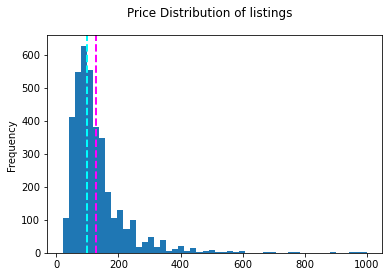

In [14]:
# Plot the histogram 

label = df_listings['price'] 
fig, ax = plt.subplots(1, 1)
ax.hist(label, bins=50)
ax.set_ylabel('Frequency')
ax.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
fig.suptitle('Price Distribution of listings')

I can see that some columns are missing a lot of information. I want to identify which columns I should exclude my from analysis.  

Next I want to see the relationship between each of the numeric columns and price 

In [15]:
df_numeric_features = df_listings.select_dtypes(include=['float64', 'int64'])
df_numeric_features

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,calculated_host_listings_count,host_for
0,96.0,100.0,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,2,1,365,2,1607.0
1,98.0,100.0,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,1,2,90,6,1047.0
2,67.0,100.0,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,10,4,30,2,571.0
3,NaN,NaN,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,100.0,1,1,1125,1,789.0
4,100.0,NaN,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,6,1,1125,1,1497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,99.0,100.0,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,3.0,359.0,1,3,1125,8,266.0
3814,100.0,100.0,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,2.0,79.0,3,2,29,1,82.0
3815,NaN,NaN,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,1.0,93.0,2,1,7,1,5.0
3816,100.0,NaN,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,1.0,99.0,1,3,1125,1,366.0


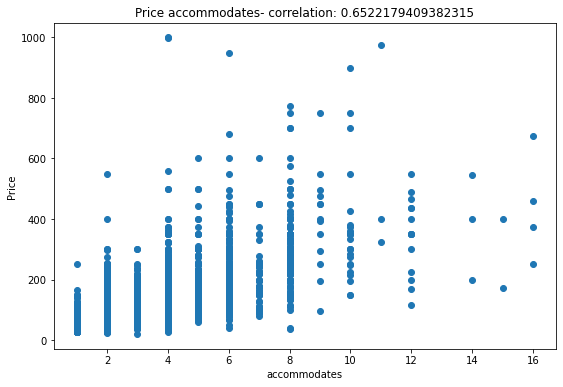

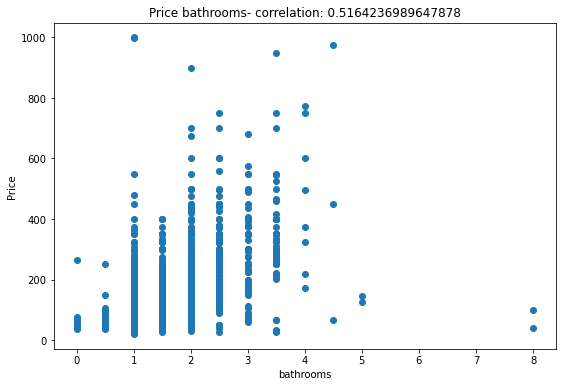

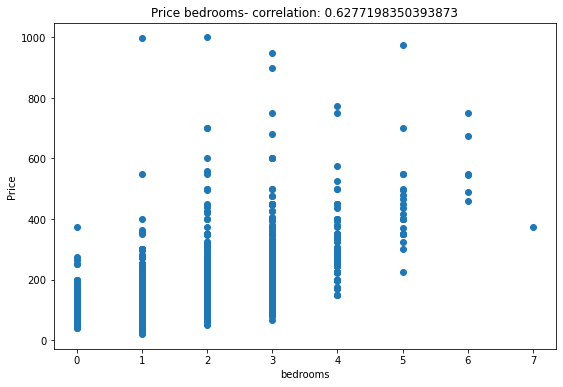

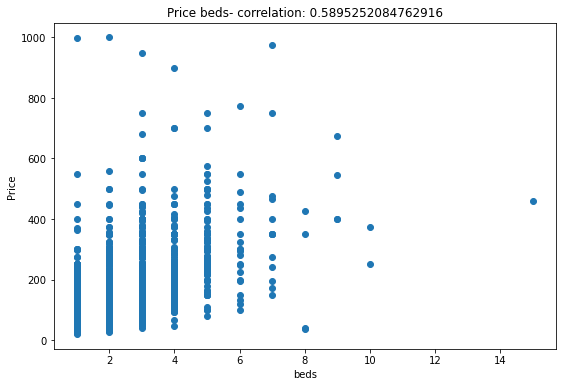

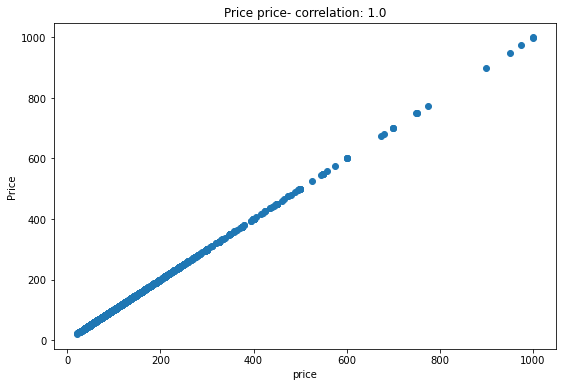

In [16]:
# View plots of numeric features where there is a correlation with price (> 0.5)

label = df_listings["price"]

for col in df_numeric_features:
    feature = df_listings[col]
    correlation = feature.corr(label)
    if correlation > 0.5:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel("Price")
        ax.set_title('Price ' + col + '- correlation: ' + str(correlation))
plt.show()

Looking at the plots above, the columns that I would like to include in my machine learning model are as follows:

In [17]:
# Numerical columns to keep:
numerical = ['accommodates', 'bathrooms', 'bedrooms','beds', 'price']

Next, I want to look at the categorial features that could have an influence on my price

In [18]:
df_categorical_features = df_listings.select_dtypes(include=['object'])
df_categorical_features

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,property_type,room_type,bed_type,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen
0,within a few hours,f,t,t,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,f,moderate,f,f,t,t,t
1,within an hour,t,t,t,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,f,strict,t,t,t,t,t
2,within a few hours,f,t,t,Queen Anne,98119,House,Entire home/apt,Real Bed,f,strict,f,f,t,t,t
3,NaN,f,t,t,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,f,flexible,f,f,t,t,t
4,within an hour,f,t,t,Queen Anne,98119,House,Entire home/apt,Real Bed,f,strict,f,f,t,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,within a few hours,f,t,t,Other neighborhoods,98107,House,Entire home/apt,Real Bed,f,strict,f,f,t,t,t
3814,within an hour,f,t,t,Capitol Hill,98102,Apartment,Entire home/apt,Real Bed,f,moderate,f,f,t,t,t
3815,NaN,f,t,f,Rainier Valley,98178,House,Entire home/apt,Real Bed,f,moderate,f,f,t,t,t
3816,within an hour,f,t,t,Capitol Hill,98112,Condominium,Entire home/apt,Real Bed,f,moderate,f,f,t,t,t


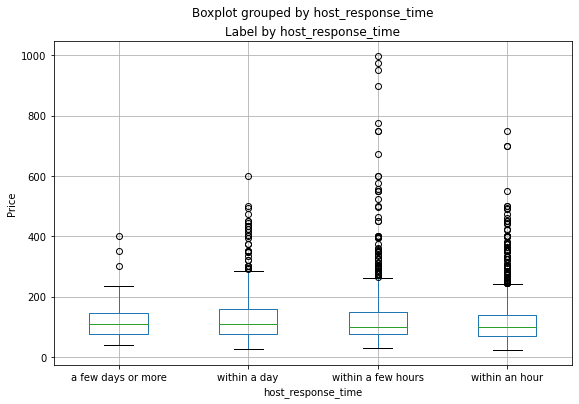

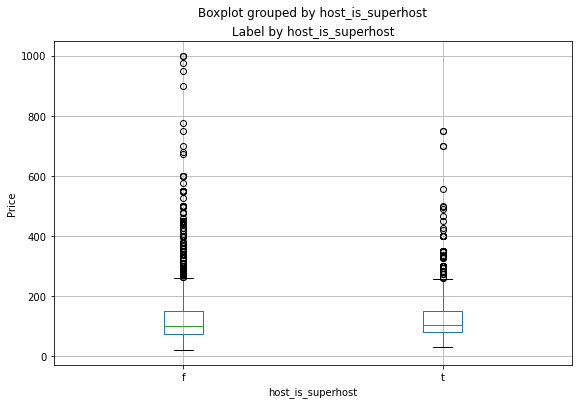

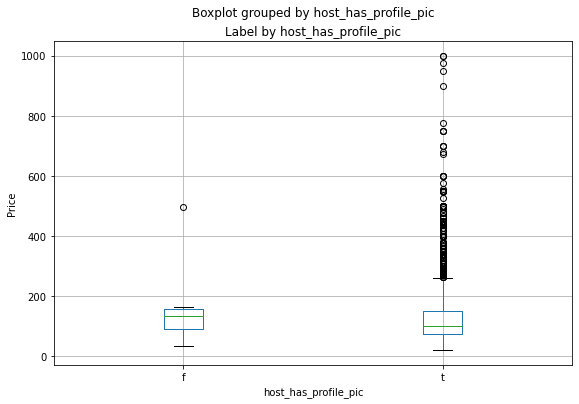

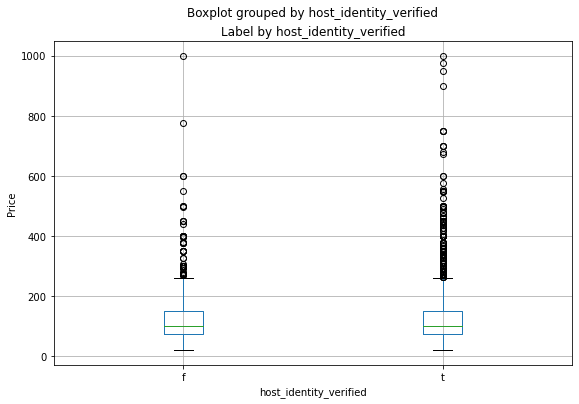

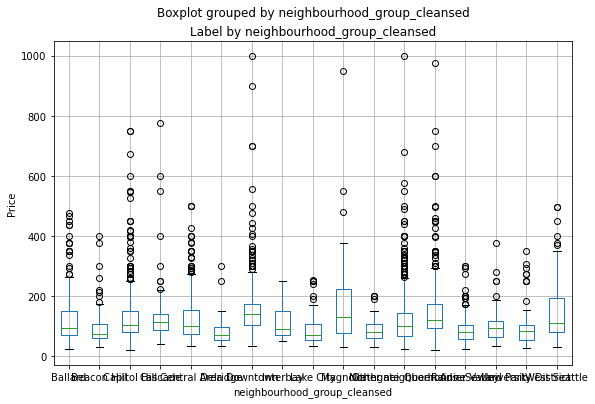

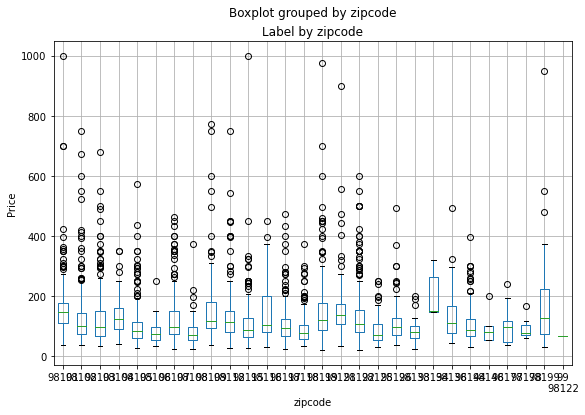

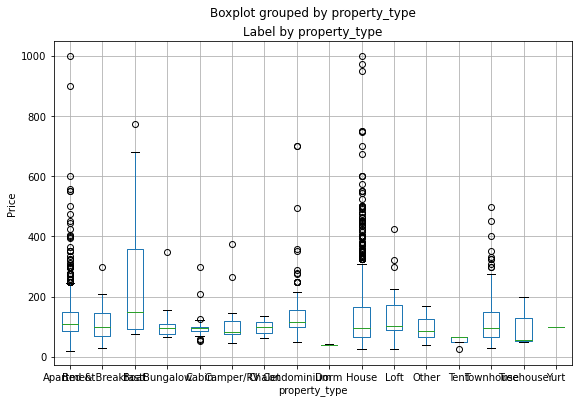

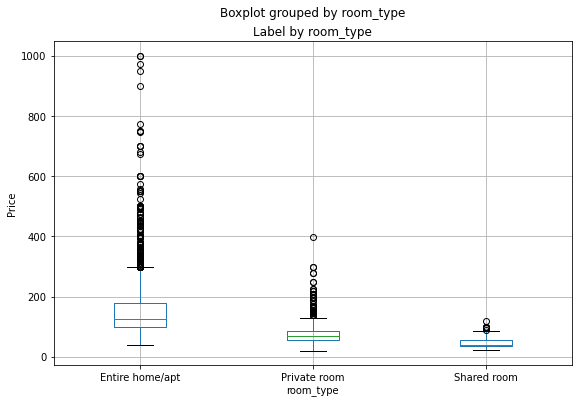

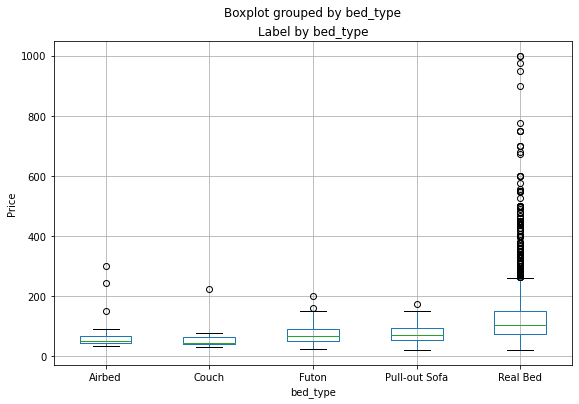

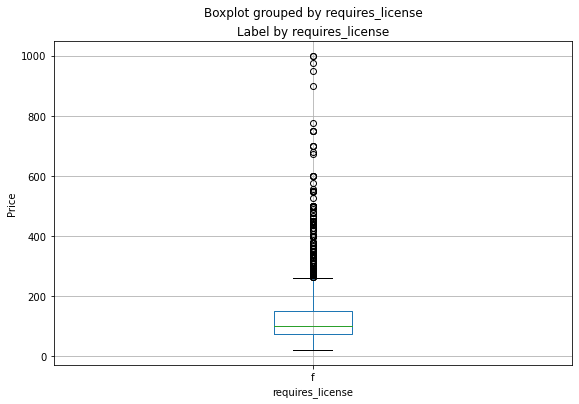

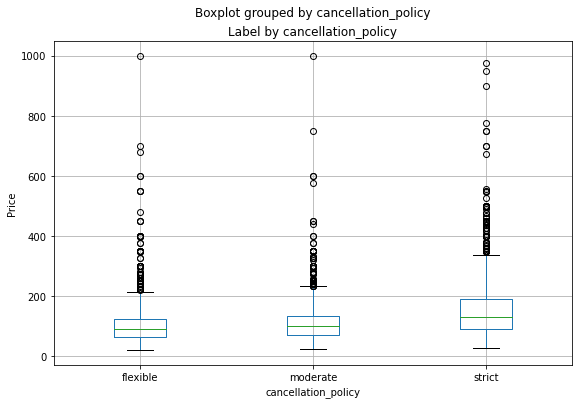

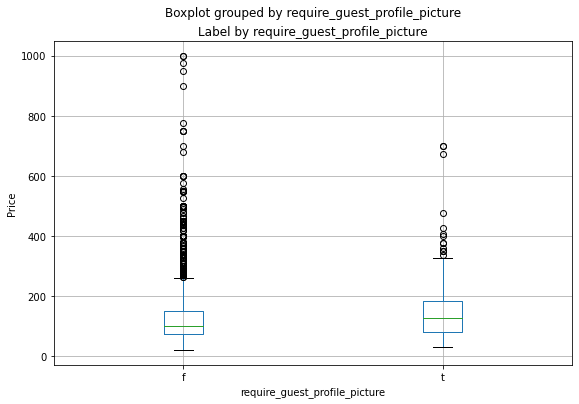

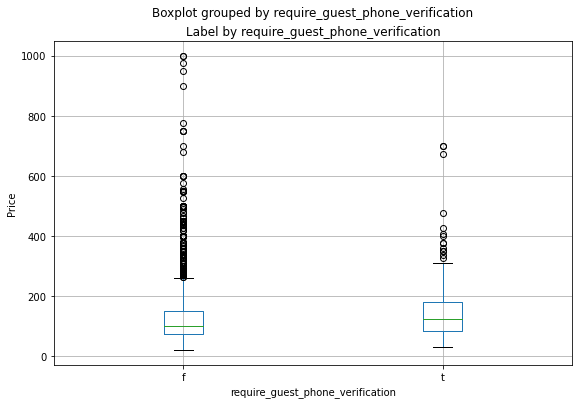

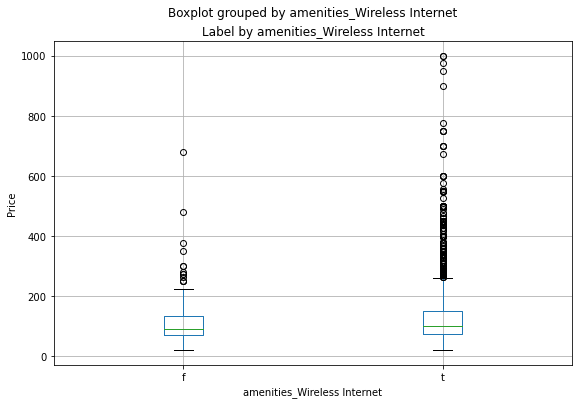

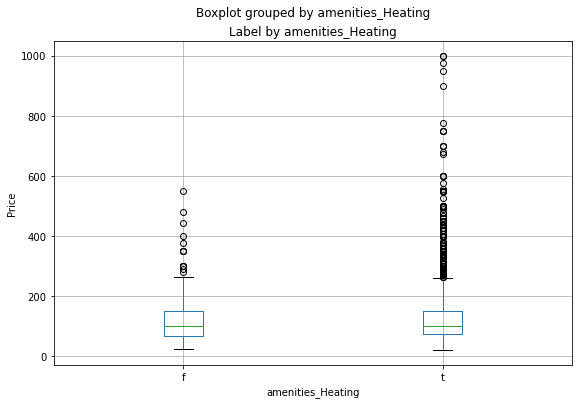

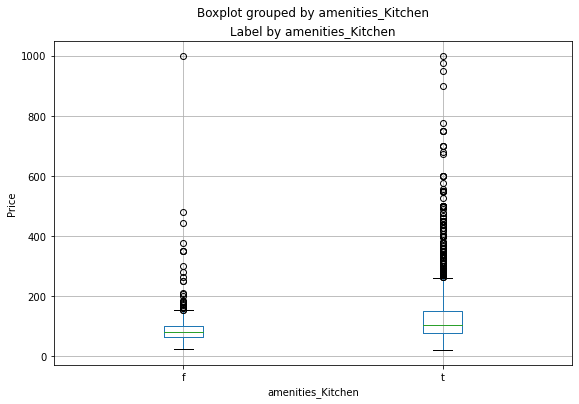

In [19]:
# View plots of categorical features compared to price

for col in df_categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df_listings.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

Looking at the above plots, the columns I would like to keep in my model are:

In [20]:
# Categorical values to keep
categorical = ['host_response_time', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
              'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'require_guest_profile_picture', 
              'require_guest_phone_verification', 'amenities_Wireless Internet','amenities_Heating', 'amenities_Kitchen' ]

My final dataset for training a model will be a combination of numerical and categorical features

# Step 5: Modelling

In [21]:
df = df_listings[numerical + categorical]
df

,accommodates,bathrooms,bedrooms,beds,price,host_response_time,host_has_profile_pic,neighbourhood_group_cleansed,property_type,room_type,bed_type,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen
0,4,1.0,1.0,1.0,85.0,within a few hours,t,Queen Anne,Apartment,Entire home/apt,Real Bed,moderate,f,f,t,t,t
1,4,1.0,1.0,1.0,150.0,within an hour,t,Queen Anne,Apartment,Entire home/apt,Real Bed,strict,t,t,t,t,t
2,11,4.5,5.0,7.0,975.0,within a few hours,t,Queen Anne,House,Entire home/apt,Real Bed,strict,f,f,t,t,t
3,3,1.0,0.0,2.0,100.0,NaN,t,Queen Anne,Apartment,Entire home/apt,Real Bed,flexible,f,f,t,t,t
4,6,2.0,3.0,3.0,450.0,within an hour,t,Queen Anne,House,Entire home/apt,Real Bed,strict,f,f,t,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,359.0,within a few hours,t,Other neighborhoods,House,Entire home/apt,Real Bed,strict,f,f,t,t,t
3814,4,1.0,1.0,2.0,79.0,within an hour,t,Capitol Hill,Apartment,Entire home/apt,Real Bed,moderate,f,f,t,t,t
3815,2,1.0,1.0,1.0,93.0,NaN,t,Rainier Valley,House,Entire home/apt,Real Bed,moderate,f,f,t,t,t
3816,2,1.0,0.0,1.0,99.0,within an hour,t,Capitol Hill,Condominium,Entire home/apt,Real Bed,moderate,f,f,t,t,t


First I need to dummy my categorical variables

In [22]:
def create_dummy_df(df, cat_cols, dummy_na):
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [23]:
df = create_dummy_df(df, categorical, dummy_na=False)
df.head()

,accommodates,bathrooms,bedrooms,beds,price,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_has_profile_pic_t,neighbourhood_group_cleansed_Beacon Hill,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t,amenities_Wireless Internet_t,amenities_Heating_t,amenities_Kitchen_t
0,4,1.0,1.0,1.0,85.0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,1,1
1,4,1.0,1.0,1.0,150.0,0,0,1,1,0,...,0,0,1,0,1,1,1,1,1,1
2,11,4.5,5.0,7.0,975.0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,1,1
3,3,1.0,0.0,2.0,100.0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1
4,6,2.0,3.0,3.0,450.0,0,0,1,1,0,...,0,0,1,0,1,0,0,1,1,1


For my numeric features, I need to ensure there are no missing values. I will use the mean filling method for this:

In [24]:
#Input missing features

fill_mean = lambda col: col.fillna(col.mean())
df = df.apply(fill_mean, axis = 0)

check_missing_values(df)

'No columns with missing values'

Now I can set my X and y for the model

In [25]:
X = df.drop(columns = 'price')
y = df_listings['price']

In [26]:
#Train and evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))


/Users/kirsten.young/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


'The r-squared score for your model was 0.5913049024786413 on 1146 values.'

# Step 6: Visualise

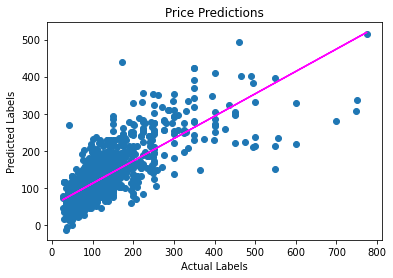

In [27]:
#Plot 

plt.scatter(y_test,y_test_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_test_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

I want to determine which features are the best indicators for price

In [28]:
#Create function to deterine top indicators for price
def coef_weights(coefficients, X_train):
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [29]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df

,est_int,coefs,abs_coefs
25,property_type_Boat,147.552992,147.552992
40,room_type_Shared room,-62.852604,62.852604
28,property_type_Camper/RV,61.933798,61.933798
31,property_type_Dorm,-61.591403,61.591403
13,neighbourhood_group_cleansed_Downtown,39.743479,39.743479
35,property_type_Tent,-35.724890,35.724890
39,room_type_Private room,-34.544573,34.544573
16,neighbourhood_group_cleansed_Magnolia,33.249925,33.249925
6,host_response_time_within an hour,-33.041393,33.041393
38,property_type_Yurt,29.092619,29.092619


The top indicators for price.  indication of the impact of each variable on the salary. The larger the coefficient, the larger the expected impact on salary.

In [30]:
# Save the model as a pickle file
filename = './lm_model.pkl'
joblib.dump(lm_model, filename)

['./lm_model.pkl']

In [31]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

/Users/kirsten.young/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]


ValueError: X has 10 features, but LinearRegression is expecting 52 features as input.